###### 11월 14일


# 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 시각화를 주피터에 
%matplotlib inline

#한글 폰트를 선명하게 보기위해
%config Inlinebackend.fiure_format = 'retina'
mpl.rc('font',family = 'malgun gothic')
# 유니코드에서 음수로 부호설정
mpl.rc('axes',unicode_minus = False)

# 차트 설정 
sns.set(font = "malgun gothic", rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10,8))
warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [2]:
# 모기지수 : 일 평균 모기 개체수

In [3]:
mos = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\mosquito_Indicator.csv')

In [4]:
mos

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [5]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


## 데이터 탐색 EDA

In [6]:
mos.keys()

Index(['date', 'mosquito_Indicator', 'rain(mm)', 'mean_T(℃)', 'min_T(℃)',
       'max_T(℃)'],
      dtype='object')

In [7]:
#mos.columns !! 나중에 보고 삭제

In [8]:
#colums=mos.keys() !! 나중에 보고 필요없으면 삭제

In [9]:
# !!이거 만들필요가 있나??!!
#df = pd.DataFrame(mos , columns=colums)

In [10]:
#df.columns = ['date','mosquito_Indicator','rain','mean_T','min_T','max_T'] !! 나중에 보고 삭제

### 데이터 시각화

In [7]:
def plot_hist(df):
    # 하나의 도화지에 20개의 그래프 그리기
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure()
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(3,2,i+1) # 5행5열에서 i+1번째 #ax : 축
        plt.hist(df[df.columns[i]],bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

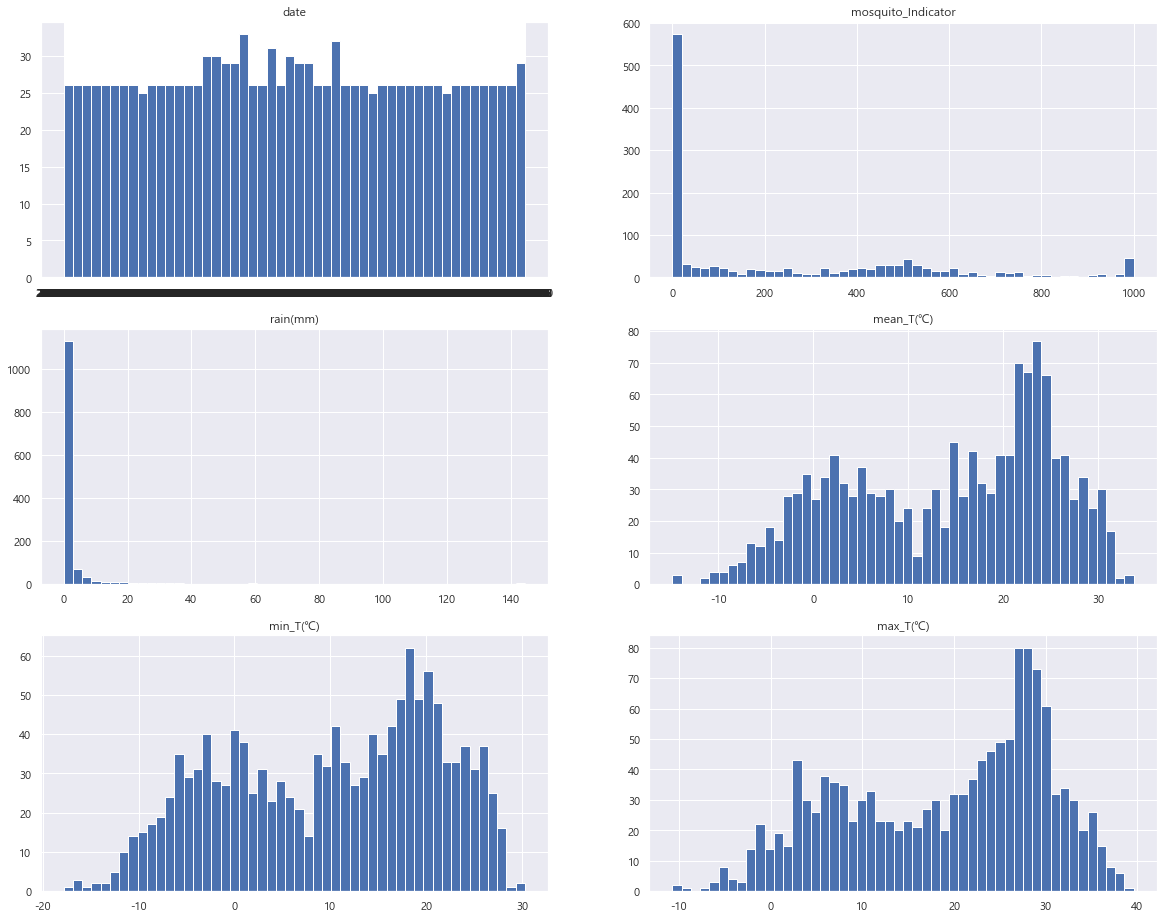

In [78]:
plot_hist(mos)

In [15]:
mos['mosquito_Indicator'].describe()

count    1342.000000
mean      251.991803
std       295.871336
min         0.000000
25%         5.500000
50%        91.900000
75%       480.400000
max      1000.000000
Name: mosquito_Indicator, dtype: float64

## 데이터 전처리

### 중복된 데이터 제거

In [8]:
mos.date.is_unique

False

In [17]:
print(mos.date.count())
print(mos.date.nunique())

1342
1295


https://min23th.tistory.com/45

In [18]:
mos = mos.drop_duplicates(subset=['date']) ### 중복된거 지우는거임

In [19]:
mos.date.is_unique  ## True란것은 중복이 없다는 것임

True

In [20]:
print(mos.date.count())
print(mos.date.nunique())

1295
1295


In [21]:
mos.date

0       2016-05-01
1       2016-05-02
2       2016-05-03
3       2016-05-04
4       2016-05-05
           ...    
1337    2019-12-27
1338    2019-12-28
1339    2019-12-29
1340    2019-12-30
1341    2019-12-31
Name: date, Length: 1295, dtype: object

### 날짜로 데이터타입 변경

In [22]:
mos['date'] = pd.to_datetime(mos['date'])

In [23]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1295 non-null   datetime64[ns]
 1   mosquito_Indicator  1295 non-null   float64       
 2   rain(mm)            1295 non-null   float64       
 3   mean_T(℃)           1295 non-null   float64       
 4   min_T(℃)            1295 non-null   float64       
 5   max_T(℃)            1295 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 70.8 KB


### 스케일링

In [24]:
data = mos.drop(['mosquito_Indicator', 'date'],axis = 1)
target = mos['mosquito_Indicator']

In [25]:
data

,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.0,18.8,12.2,26.0
1,16.5,21.1,16.5,28.4
2,27.0,12.9,8.9,17.6
3,0.0,15.7,10.2,20.6
4,7.5,18.9,10.2,26.9
...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6
1338,0.0,1.1,-3.6,6.1
1339,1.4,3.8,1.1,6.2
1340,0.4,2.7,-5.7,6.8


In [27]:
target
## !! 인데스 번호 1341와 길이 1295가 다른것은 인덱스번호는 그대로 남아있기때문

0       254.4
1       273.5
2       304.0
3       256.2
4       243.8
        ...  
1337      5.5
1338      5.5
1339      5.5
1340      5.5
1341      5.5
Name: mosquito_Indicator, Length: 1295, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(data)

In [29]:
scaled.shape

(1295, 4)

In [26]:
# # '월' 만 분리 !! 나중에 다시 확인
# mos['date_m'] = mos['date'].dt.strftime('%m')
# mos.head()

### train, test 나누기

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size = 0.2, random_state = 1121)

# 회귀분석

## LinearRegression 알고리즘

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)         

In [30]:
## !! 책323 metrics.mean_absolute, metrics.mean_squared_error, metrics.r2_score

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 152.494, MSE:  39084.151, RMSE:  197.697, R2:0.545


In [34]:
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.561818520440136
0.5453776460188773


## 다항회귀

### 사이킷런 변환기_3차

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3 , include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x3^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x3^2',
 'x2^3',
 'x2^2 x3',
 'x2 x3^2',
 'x3^3']

In [36]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.6412912318596309
-2.158969368778374


In [37]:
print(X_train.shape)
y_train = np.array(y_train).reshape(-1,1) # 2차원으로 차원 변경
print(y_train.shape)

(1036, 4)
(1036, 1)


### 사이킷런 변환기_2차

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

### 다중회귀_2차

In [39]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.6013579279220858
0.4889815298922211


### 릿지 규제
- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용

In [40]:
from sklearn.linear_model import Ridge, Lasso
# 훈련세트와 테스트세트의 정수가 가장 가까운 지점이 최적의 alpha 값이 된다
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지모델
    ridge = Ridge(alpha = alpha)
    #릿지모델 훈련
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test,y_test))

In [41]:
# print(train_score)
# print(test_score)
# !!나중에 삭제하기

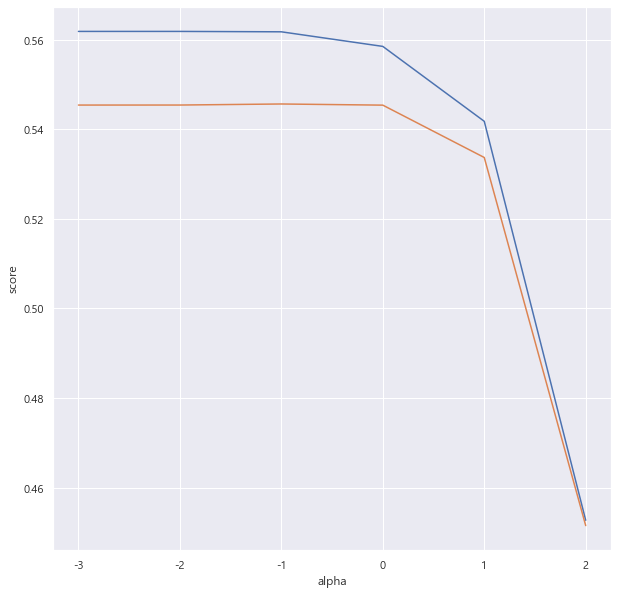

In [42]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 확률일 높은 것 중에 폭이 가장 좁은게 -1(0.1)과 0(1)/ 점수는 낮지만 폭이 좁은건 1(10)

In [43]:
# alpha가 10(1)
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5417508701720717
0.5336737589918069


In [44]:
# alpha가 1
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5584720652391784
0.5453594913007357


In [45]:
# alpha가 -1
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5617292087395449
0.5456175742772317


- 알파값이 0.1(-1)일때가 예측값이 높고, 과대적합이 가장 최소화 되는 구간? !!

### 라쏘규제

In [46]:
lasso = Lasso()

lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [47]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘모델
    lasso = Lasso(alpha = alpha)
    #릿지모델 훈련
    lasso.fit(X_train, y_train)
    #결정계수(R2 score)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))

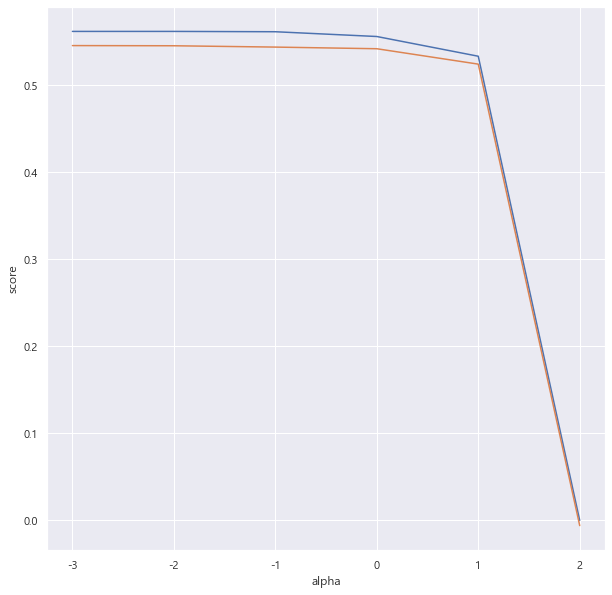

In [48]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 시각화로 봤을 때 -1(0.1), 0(1), 1(10) 넣어보기

In [49]:
# 알파값 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5614372438900941
0.5437997463207276


In [50]:
# 알파값 1
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [51]:
# 알파값 10
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5332946185403951
0.5242197770735639


- 릿지가 조금더 좋은 결과값이 나옴
-1 <br>
0.568638174457321<br>
0.553378946756842<br>
<br>
0.1<br>
0.5678192530074133<br>
0.5529708289748807<br>

# 시계열 분석

## 예측

## 분류

## 회귀

### 모듈 불러오기

In [52]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [53]:
#_centered 이게 미리 설치 되어 있어서 충돌이 일어나 모듈 import가 안되서 함수로 따로 만듬
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [75]:
scaled

array([[0.        , 0.69278351, 0.62370062, 0.72962227],
       [0.11418685, 0.74020619, 0.71309771, 0.77733598],
       [0.18685121, 0.57113402, 0.55509356, 0.56262425],
       ...,
       [0.00968858, 0.38350515, 0.39293139, 0.3359841 ],
       [0.00276817, 0.36082474, 0.25155925, 0.34791252],
       [0.        , 0.14226804, 0.14345114, 0.12326044]])

In [78]:
mos[mos['date'] == '2017-06-11']

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
405,2017-06-11,422.0,0.0,22.8,14.8,29.6


In [63]:
data.columns

Index(['rain(mm)', 'mean_T(℃)', 'min_T(℃)', 'max_T(℃)'], dtype='object')

In [72]:
mos_scaled = pd.DataFrame(scaled, columns=data.columns)

In [73]:
mos_scaled['date'] = mos.date

In [74]:
mos_scaled

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),date
0,0.000000,0.692784,0.623701,0.729622,2016-05-01
1,0.114187,0.740206,0.713098,0.777336,2016-05-02
2,0.186851,0.571134,0.555094,0.562624,2016-05-03
3,0.000000,0.628866,0.582121,0.622266,2016-05-04
4,0.051903,0.694845,0.582121,0.747515,2016-05-05
...,...,...,...,...,...
1290,0.000000,0.270103,0.274428,0.264414,2019-11-13
1291,0.000000,0.327835,0.295218,0.333996,2019-11-14
1292,0.009689,0.383505,0.392931,0.335984,2019-11-15
1293,0.002768,0.360825,0.251559,0.347913,2019-11-16


In [90]:
mos_scaled = pd.DataFrame(scaled, columns=data.columns)

In [88]:
mos_scaled['date'] = mos.date

In [93]:
mos_scaled.to_excel('mos_test.excel')

ValueError: No engine for filetype: 'excel'

In [83]:
mos.date.tail(10)

1329   2019-12-22
1330   2019-12-23
1331   2019-12-24
1332   2019-12-25
1336   2019-12-26
1337   2019-12-27
1338   2019-12-28
1339   2019-12-29
1340   2019-12-30
1341   2019-12-31
Name: date, dtype: datetime64[ns]

In [62]:
mos_scaled = pd.DataFrame(scaled, columns=data.columns)
mos_scaled['date'] = mos.date
mos_scaled['Indi'] = target
mos_scaled

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),date,Indi
0,0.000000,0.692784,0.623701,0.729622,2016-05-01,254.4
1,0.114187,0.740206,0.713098,0.777336,2016-05-02,273.5
2,0.186851,0.571134,0.555094,0.562624,2016-05-03,304.0
3,0.000000,0.628866,0.582121,0.622266,2016-05-04,256.2
4,0.051903,0.694845,0.582121,0.747515,2016-05-05,243.8
...,...,...,...,...,...,...
1290,0.000000,0.270103,0.274428,0.264414,2019-11-13,5.5
1291,0.000000,0.327835,0.295218,0.333996,2019-11-14,5.5
1292,0.009689,0.383505,0.392931,0.335984,2019-11-15,5.5
1293,0.002768,0.360825,0.251559,0.347913,2019-11-16,5.5


In [42]:
mos_scaled.date.sort_values()

0     2016-05-01
1     2016-05-02
2     2016-05-03
3     2016-05-04
4     2016-05-05
         ...    
801          NaT
802          NaT
807          NaT
808          NaT
809          NaT
Name: date, Length: 1295, dtype: datetime64[ns]

In [ ]:
mos_scaled

In [61]:
mos_scaled.date

0      2016-05-01
1      2016-05-02
2      2016-05-03
3      2016-05-04
4      2016-05-05
          ...    
1290   2019-11-13
1291   2019-11-14
1292   2019-11-15
1293   2019-11-16
1294   2019-11-17
Name: date, Length: 1295, dtype: datetime64[ns]

In [69]:
len(mos_scaled.date)

1295

#### 대 시험 공장

In [90]:
mos_test = mos[['date', 'mosquito_Indicator']]

In [91]:
mos_test['date'] = pd.to_datetime(mos_test['date'])

In [92]:
mos_test

,date,mosquito_Indicator
0,2016-05-01,254.4
1,2016-05-02,273.5
2,2016-05-03,304.0
3,2016-05-04,256.2
4,2016-05-05,243.8
...,...,...
1337,2019-12-27,5.5
1338,2019-12-28,5.5
1339,2019-12-29,5.5
1340,2019-12-30,5.5


In [94]:
mos_test2 = mos_test.set_index('date')

In [95]:
mos_test2.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=1295, freq=None)

In [30]:
# 일별 
mos_p = mos_scaled[['date', 'Indi']]
mos_p = mos_p.set_index('date')
mos_p

,Indi
date,
2016-05-01,254.4
2016-05-02,273.5
2016-05-03,304.0
2016-05-04,256.2
2016-05-05,243.8
...,...
2019-12-27,5.5
2019-12-28,5.5
2019-12-29,5.5


In [33]:
mos_p

,Indi
2016-05-01,254.4
2016-05-02,273.5
2016-05-03,304.0
2016-05-04,256.2
2016-05-05,243.8
...,...
2019-12-27,5.5
2019-12-28,5.5
2019-12-29,5.5
2019-12-30,5.5


In [65]:
# datetime -> period로 바꾸기
mos_p.index=mos_p.index.to_period('M')


In [34]:
series_ts = pd.Series(range(len(mos_p.index))

                      , index=mos_p.index.sort_values())

In [35]:
series_ts

2016-05-01       0
2016-05-02       1
2016-05-03       2
2016-05-04       3
2016-05-05       4
              ... 
2019-12-27    1337
2019-12-28    1338
2019-12-29    1339
2019-12-30    1340
2019-12-31    1341
Length: 1342, dtype: int64

In [43]:
mos_p.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=1342, freq=None)

In [50]:
mos = mos.drop_duplicates(subset=['date'])

In [45]:
mos_p.index[mos_p.index == '2019-12-30']


DatetimeIndex(['2019-12-30'], dtype='datetime64[ns]', freq=None)

In [58]:
mos_p

,Indi
2016-05-01,254.4
2016-05-02,273.5
2016-05-03,304.0
2016-05-04,256.2
2016-05-05,243.8
...,...
2019-12-27,5.5
2019-12-28,5.5
2019-12-29,5.5
2019-12-30,5.5


In [57]:
mos_p.index.is_unique

False

### 모기 데이터 시계열 시각화

In [77]:
mos.date

0       2016-05-01
1       2016-05-02
2       2016-05-03
3       2016-05-04
4       2016-05-05
           ...    
1337    2019-12-27
1338    2019-12-28
1339    2019-12-29
1340    2019-12-30
1341    2019-12-31
Name: date, Length: 1295, dtype: object

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

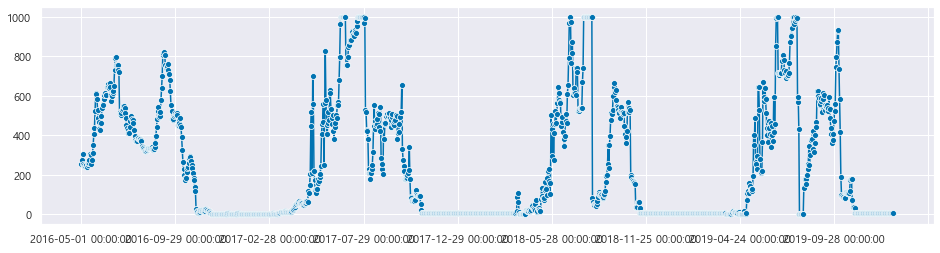

In [96]:
# 시계열 데이터 그래프
# 인덱스가 데이터 타입인 시리즈를 가지고 그레프 그리기
from sktime.utils.plotting import plot_series
plot_series(mos_test2)

### 월별 그래프 (다시)

In [ ]:
# 월별 그래프
mos_p_m = mos_scaled[['date', 'Indi']]
mos_p_m['date']= mos_p.index.strftime('%Y-%m').astype('datetime64')
mos_p_m = mos_p_m.set_index('date')
mos_p_m = mos_p_m.date.sum()
mos_p_m 

In [ ]:
mos_p_m = mos_p.reset_index()
mos_p_m.index = mos_p[mos_p.date.day == 1]
mos_p_m['mos_p_m'] =mos_p.groupby([mos_p.index.year,mos_p.index.month])['Indi'].sum()
mos_p_m

In [ ]:
a=mos_p.groupby([mos_p.index.year,mos_p.index.month])['Indi'].sum()
a[1:2]

In [ ]:
# 월별 그래프
mos_p_m = mos_scaled[['date', 'Indi']]
mos_p_m['date_m']= mos_p_m.date.dt.strftime('%Y-%m')
mos_p_m = mos_p_m.drop_duplicates(subset=['date_m'])
# mos_p.groupby([mos_p.index.year,mos_p.index.month])['Indi'].sum()

#mos.date.is_unique
# mos_p_m = mos_p_m.set_index('date')
mos_p_m 

In [ ]:
# # mod_p.reset_index(inplace=True)
mos_p_m= mos_p.index.month.min()
    #.dt.strftime('%Y-%m')
# # data['FirstOrder'] = FirstOrder
# # FirstOrder.head()
# mos_p_m

mos_p_m

mos_p.groupby([mos_p.index.year,mos_p.index.month])['Indi'].sum()

In [ ]:
mos.date.min()

## 2020 년 1월 모기지수 예측

### 기간(범위) 지정

In [ ]:
# 예측 범위(2020 1월 달 => 31일)

day = np.arange(1,32)

In [ ]:
from sktime.forecasting.base import ForecastingHorizon

# 예측할 날짜 데이터 만들기

jan = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2020-01-01", periods=31, freq="D")), is_relative=False
)
jan

In [ ]:
cutoff = pd.Period("2019-12-31", freq="D")

In [ ]:
jan.to_relative(cutoff)

In [ ]:
jan.to_absolute(cutoff)

### 예측 알고리즘 지정 

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")

### 예측자를 본 데이터에 맞추기

### 예측 요청 